# Competição Kaggle - Titanic 

O naufrágio do Titanic é um dos mais famosos em toda a história, no dia 15 de abril de 1912, durante a sua viagem, o então considerado "inafundável" navio RMS Titanic afundou depois de colidir com um iceberg. Infelizmente não haviam coletes salva-vidas para todo mundo a bordo, o que resultou na morte de 1502 em um total de 2224 passageiros.

Enquanto existiu alguma sorte para os que conseguiram sobreviver, parece que alguns dos grupos de pessoas tiveram mais chance de sobreviver do que outros, e nessa competição, é pedido que desenvolva um modelo preditivo capaz de responder a seguinte pergunta: "Quais tipos de pessoas tinha a maior chance de sobreviver?"

O desafio é o seguinte: usar machine learning para criar um modelo para prever quais passageiros sobreviveriam ao naufrágio do Titanic

O arquivo de submissão deve conter o PassengerId e uma coluna booleana Survived, e deverá ter exatamente 418 registros.

Dicionário de variáveis: 
Survival -> se o passageiro sobreviveu (0 = Não, 1 = Sim)
pclass -> classe do ticket 
sibsp -> número de irmãos/cônjuges a bordo do navio 
parch -> número de pais/filhos a bordo do navio
ticket -> número do ticket 
fare -> preço da passagem 
cabin -> número da cabine 
embarked -> porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import os

In [20]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
display(df_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
display(df_test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<AxesSubplot:>

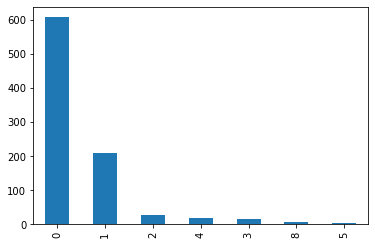

In [6]:
df_train.SibSp.value_counts().plot(kind='bar')

In [7]:
#Apenas os passageiros que sobreviveram
sobreviveram = df_train[df_train["Survived"] == 1]
sobreviveram

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [8]:
#Apenas os passageiros da classe 2 e 3
class_23 = df_train[df_train['Pclass'].isin([2, 3])]
class_23

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [9]:
#Passageiros que possuem a idade conhecida
age_na = df_train[df_train['Age'].notna()]
age_na

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
#Nome dos passageiros que são mais velhos que 35 
adult_names = df_train.loc[df_train['Age'] > 35, 'Name' ]
adult_names

1      Cumings, Mrs. John Bradley (Florence Briggs Th...
6                                McCarthy, Mr. Timothy J
11                              Bonnell, Miss. Elizabeth
13                           Andersson, Mr. Anders Johan
15                      Hewlett, Mrs. (Mary D Kingcome) 
                             ...                        
865                             Bystrom, Mrs. (Karolina)
871     Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
873                          Vander Cruyssen, Mr. Victor
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
885                 Rice, Mrs. William (Margaret Norton)
Name: Name, Length: 217, dtype: object

<AxesSubplot:>

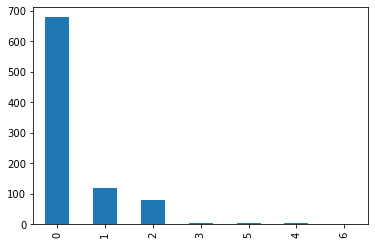

In [12]:
df_train.Parch.value_counts().plot(kind='bar')

## Ambos os dataframes de teste e treino possuem as mesmas colunas com valores nulos: Age, Fare e Cabin, porém o dataframe de teste possui a coluna Embarked com alguns valores nulos também

In [13]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [14]:
#Substituir os valores nulos das idades pela média das próprias colunas
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())



In [15]:
df_train.drop(columns=['PassengerId', 'Ticket', 'Name'], inplace=True)
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

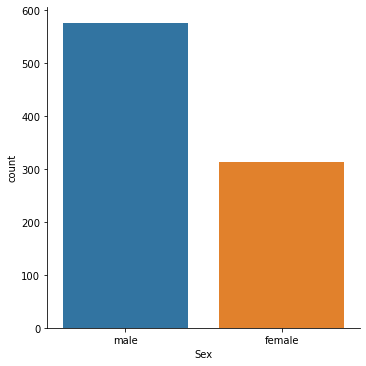

In [22]:
sns.catplot(x='Sex', kind='count', data=df_train)

<AxesSubplot:>

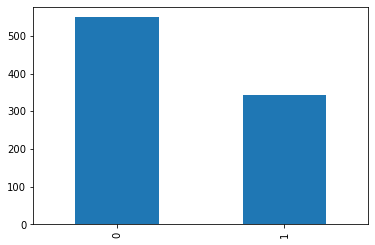

In [23]:
df_train.Survived.value_counts().plot(kind='bar')

In [21]:
#Número de homens que morreram 
subset_df = df_train[df_train['Sex'] == 'male']
subset_do_subset = subset_df[subset_df['Survived'] == 0]
subset_do_subset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [ ]:
#Pessoas que sobreviveram dependendo do genero 
df_train.groupby('Sex')

In [16]:
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'])
display(df_train)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,NaN,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,C85,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,NaN,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,C123,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,NaN,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,B42,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,NaN,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,C148,0,1,1,0,0
